<H1>Group 22: Predicting algerian forest fires<H1>

<H2>Introduction</H2>

We have all seen the rise in the number of forest fires in the past few years, and scientists and climate activists worldwide have raised their concerns. While natural in few ecosystems, these recent forest fires root their cause to the global rise in temperature and poor land management by authorities. Due to this, no matter whether a wildfire's origin is due to human intervention or natural, the drier climate makes it easy for a fire to spread over a region quite intensely.<br>
These fires are a clear call for change because they can result in irreparable damage to forest ecosystems. The gases released due to these fires travel to the city, causing health crises. While governments worldwide introduce initiatives to promote sustainable practices and the general public abides by them, it is also vital for scientists to know which forests are prone to fires. Through this project, we intend to answer the question: "Can we predict a wildfire in this Algerian forests based on given data?"<br>

<H4>Data set used:</H4>
Algerian forest fires: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv<br>
This data set has fourteen variables, thirteen of which are numerical, and one is categorical, along with 243 observations.

<H2>Loading the data set into R and wrangling it</H2>

In [2]:
install.packages("skimr")
install.packages("GGally")
library(tidyverse)
library(repr)
library(GGally)
library(tidymodels)
library(skimr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   gg

In [3]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data

# Inspecting the parsing failures

# algerian_forest_fires[123, 1:14] -- Empty row between two data sets
 
# algerian_forest_fires[168, 1:14] -- Needs to be fixed

algerian_forest_fires[168, 10] = '14.6'
algerian_forest_fires[168, 11] =  '9'
algerian_forest_fires[168, 12] =  '12.5'
algerian_forest_fires[168, 13] =  '10.4'
algerian_forest_fires[168, 14] =  "fire"

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


<H3>Upon examination we infer that:</H3>
    <li>File that we read contains 2 dataframes.</li>
    <li>The dataset's column types aren't parsed correctly</li>
<p>To extract the target data frame, we will split the file into two dataframes, tidy both of them, and lastly join them.</p>

<H4>Extracting and tidying Bejaja region data set</H4>

In [4]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
#head(bejaja_forest_tidy)

<H4>Extracting and tidying Sidi-Bel region data set</H4>

In [5]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the sidi-bel data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)


#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(as.double)


# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

<H4>Joining our two dataframes</H4> 

In [6]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
#algerian_forest_fires_tidy

# The resulting data frame is tidy and ready for the further analysis

Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



In [7]:
# Choosing the split % 
# When choosing a split percentage, you are forced to decide between a more accurate evaluation of your model's performance and the better-trained model. 
# We choose to split our data set into 75% of training data and 25% of testing data. We reasoned that since our data set is not large, allocating more observations to the testing data set would drastically decrease our model's performance. 

set.seed(2021)
# Splitting the data set
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
forest_split <- initial_split(algerian_forest_fires_tidy, prop = 0.75, strata = Classes)
forest_train <- training(forest_split)
forest_test <- testing(forest_split)

# Specifying the summary function
my_skim <- skim_with(numeric = sfl(median, mean,  sd, min, max),
                                   append = FALSE)

# Creating summary table
summary_df <- my_skim(forest_train) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)
summary_df

skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.median,numeric.mean,numeric.sd,numeric.min,numeric.max
<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Classes,0,1,FALSE,2,"fir: 104, not: 79",NA,NA,NA,NA,NA
day,0,1,NA,NA,NA,16.0,16.2622951,8.723283,1.0,31.0
month,0,1,NA,NA,NA,8.0,7.5519126,1.122343,6.0,9.0
year,0,1,NA,NA,NA,2012.0,2012.0000000,0.000000,2012.0,2012.0
Temperature,0,1,NA,NA,NA,32.0,31.9125683,3.558461,22.0,42.0
RH,0,1,NA,NA,NA,64.0,62.4153005,14.480081,24.0,89.0
Ws,0,1,NA,NA,NA,15.0,15.4699454,2.751208,6.0,26.0
Rain,0,1,NA,NA,NA,0.0,0.7868852,1.965567,0.0,16.8
FFMC,0,1,NA,NA,NA,83.8,77.7551913,14.384399,28.6,96.0


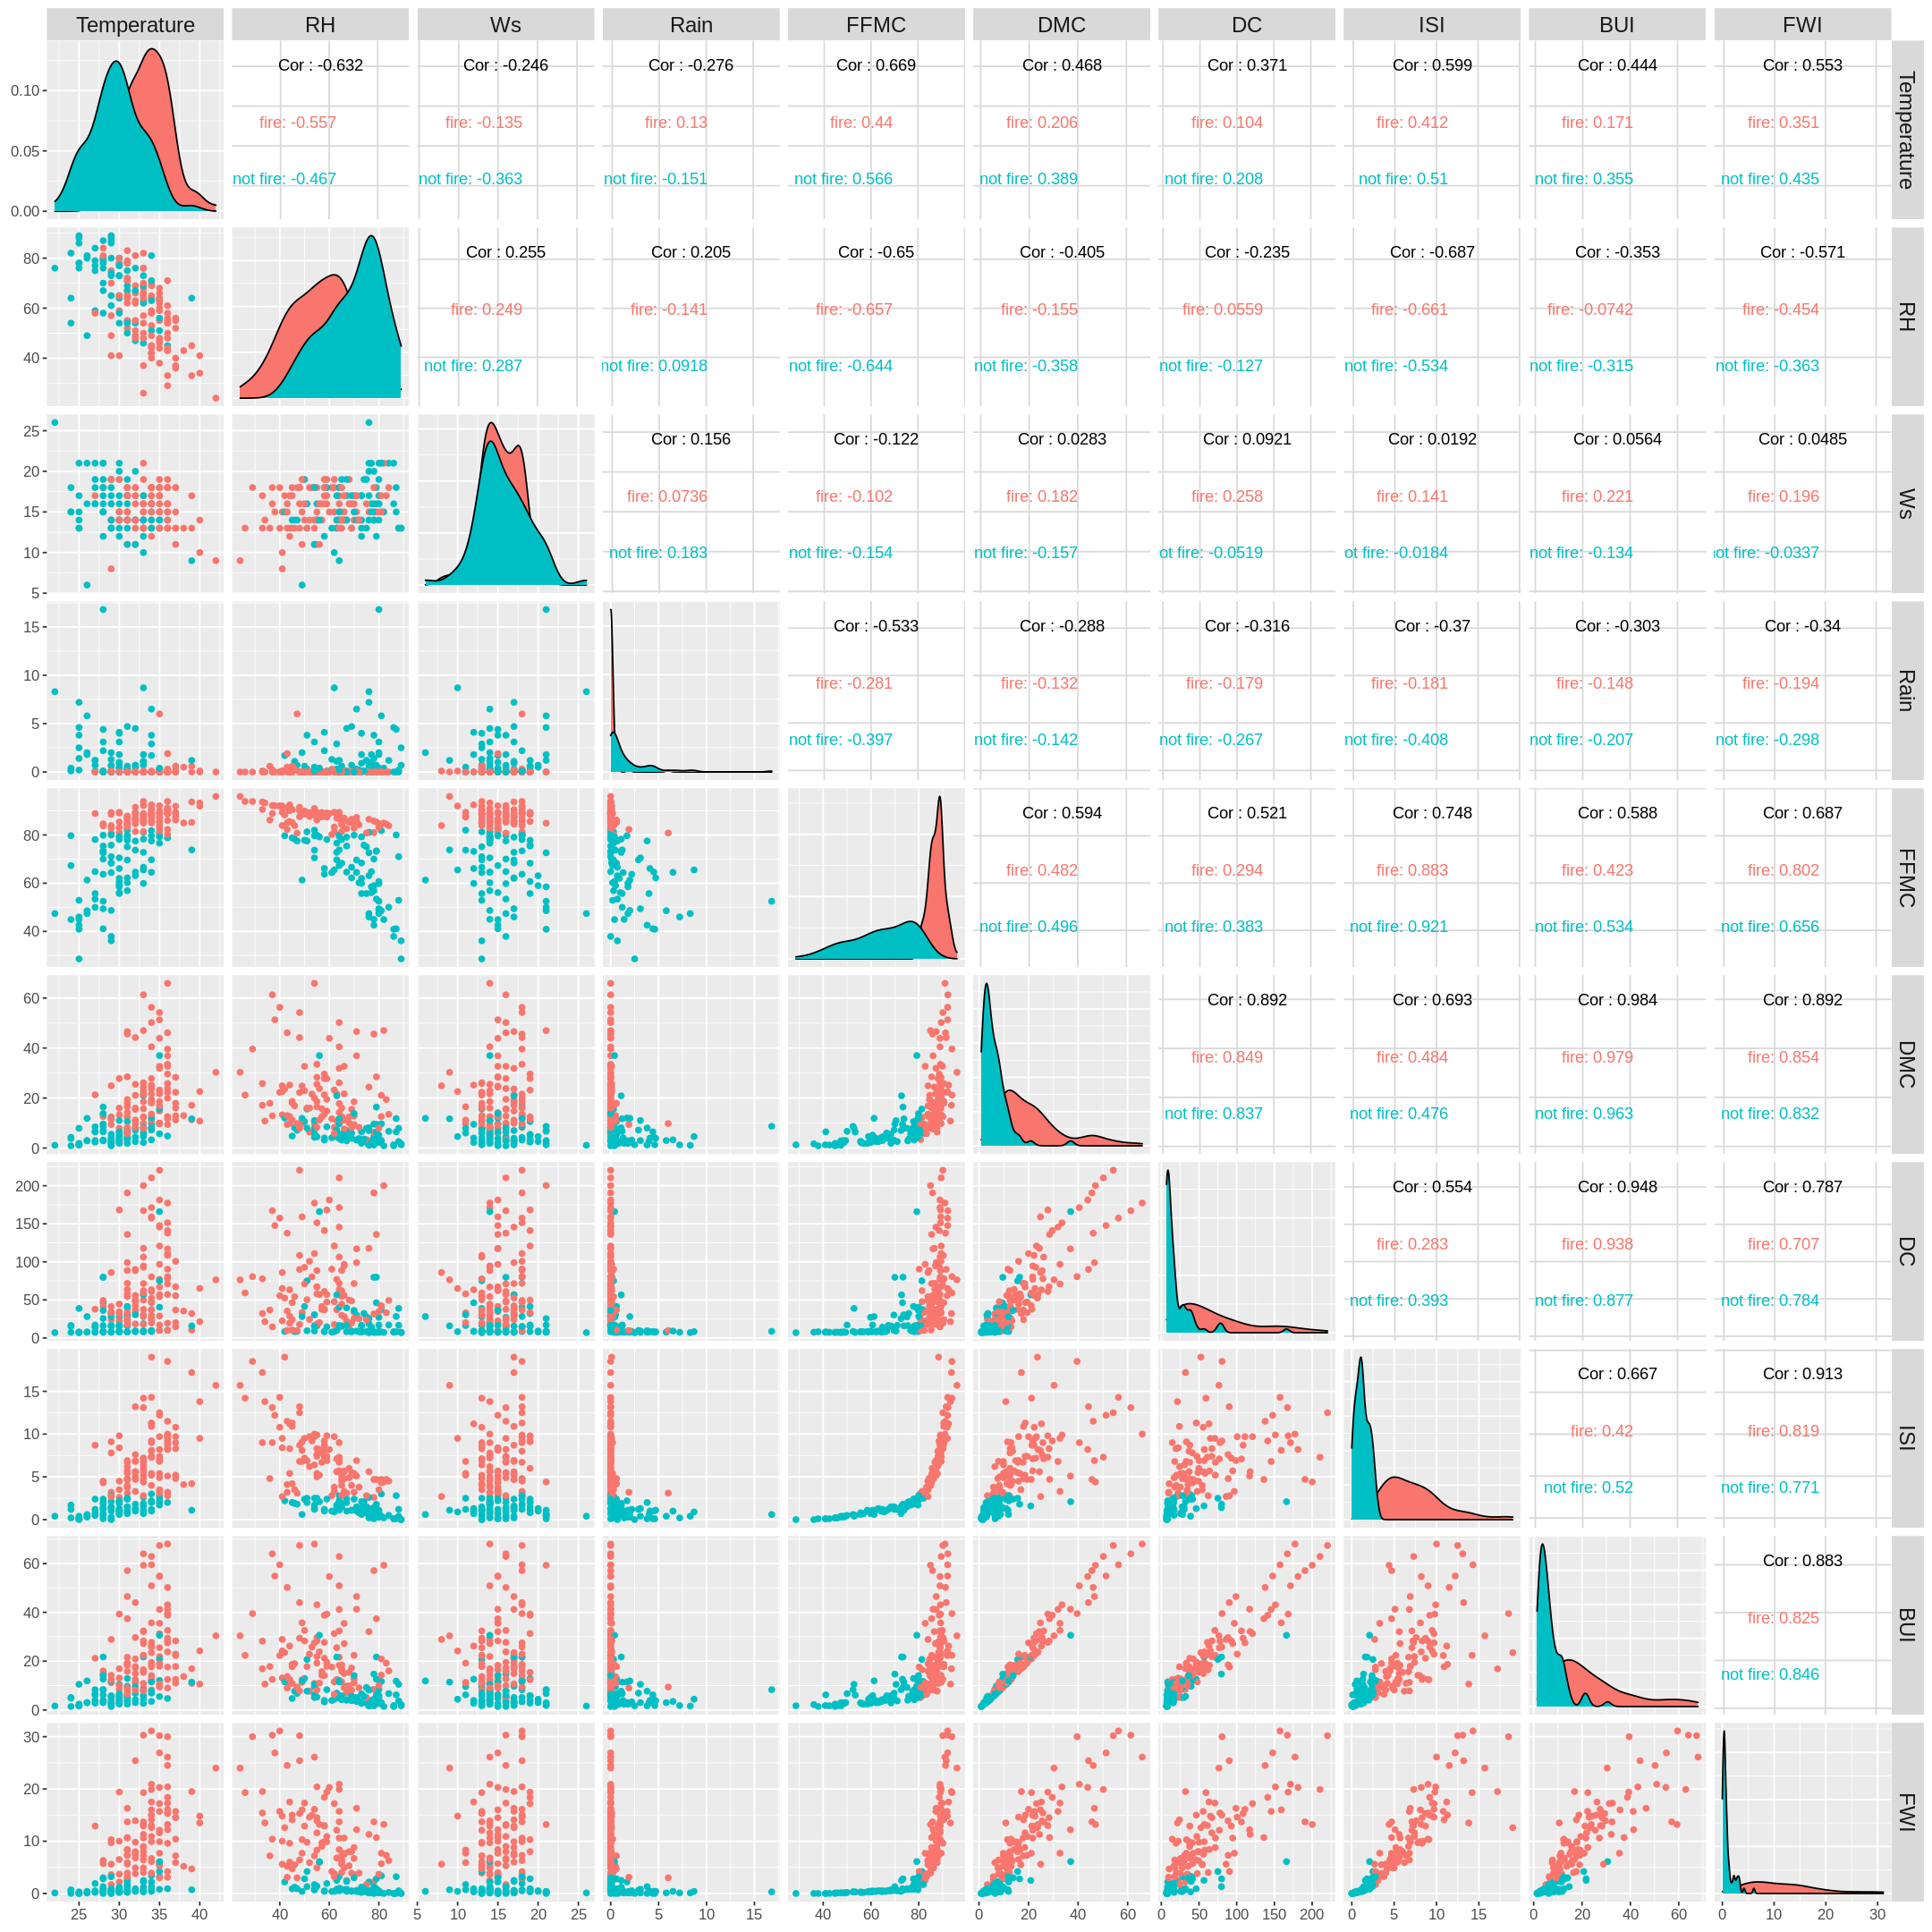

In [8]:
# Plot options
options(repr.plot.width = 18, repr.plot.height= 18)
# Removing the date data
forest_train <- select(forest_train,Temperature:Classes)
# We are using ggpairs to plot our variables against each other and see correlation
ggpairs(forest_train, columns = c("Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI"),
        aes(colour = Classes))  +
        theme(text = element_text(size = 18),
              axis.text = element_text(size = 10))

<H2>Methods</H2>

The question we seek to answer falls under the **classification** category. To answer it, we have divided our dataset into a training set and a testing set. We will use DMC, BUI, DC, ISI as predictors in the training set and tune our _K-nearest classifier_ based on outcome data. This model will then be used to predict our test set's class labels and thereby determine its accuracy.<br>
We chose these predictors precisely because, during our EDA, we found that these variables have the highest correlation.  They represent the moisture content, combustibility of forest fuel and fuel type of the forest. They are derived from variables such as temperature, rain, wind speed, and humidity calculated and predicted by scientists daily.<br>
For our visualization, we will create decision boundary plots for each combination of our predictors.<br>

In [11]:
set.seed(2021)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

ff_recipe <- recipe(Classes ~  DMC + BUI + DC + ISI, data = forest_train) %>% 
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

ff_vfold <- vfold_cv(forest_train, v = 5, strata = Classes)

knn_results <- workflow() %>%
    add_recipe(ff_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = ff_vfold, grid = c(1:10)) %>%
    collect_metrics()

best_k <- knn_results %>% 
    filter(.metric == "accuracy") %>% 
    arrange(desc(mean)) %>% 
    slice(1) %>% 
    select(neighbors) %>% 
    pull()

best_k

ff_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")


ff_fit <- workflow() %>% 
    add_recipe(ff_recipe) %>% 
    add_model(ff_knn) %>% 
    fit(data = forest_train)

ff_predictions <- predict(ff_fit, forest_test) %>% 
    bind_cols(forest_test)


ff_metrics <- ff_predictions %>% 
    metrics(truth = Classes, estimate = .pred_class)

ff_metrics


[1] 5

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9833333
kap,binary,0.9659091


<H2>Expected Outcomes and Significance</H2>

We expect to see a correlation between moderate to high values of the mentioned predictors and fire occurrence.<br>
Most importantly, this can help firefighters understand whether there is a possibility of a forest fire passing onto a different region (given region's predictors) and strategize accordingly.
Our project was trained and tested using a relatively small dataset of a particular region in Algeria. A question arises whether our model is sufficient to predict wildfires in a different part of the world, or does it need to be trained on more data?
